In [1]:
# Exchange a[i] and a[j].

def _exchange(a, i, j):
    a[i], a[j] = a[j], a[i]

In [2]:
# Sort array a into non-decreasing order.

def insertion_sort(a):
    n = len(a)
    for i in range(1, n):
        j = i
        while (j > 0) and (a[j] < a[j-1]):
            _exchange(a, j-1, j)
            j -= 1

In [3]:
# Merge a[lo:mid] with a[mid:hi] using aux as auxiliary memory.

def _merge(a, lo, mid, hi, aux):
    n = hi - lo
    i = lo
    j = mid
    for k in range(n):
        if i == mid:
            aux[k] = a[j]
            j += 1
        elif j == hi:
            aux[k] = a[i]
            i += 1
        elif a[j] < a[i]:
            aux[k] = a[j]
            j += 1
        else:
            aux[k] = a[i]
            i += 1
    a[lo:hi] = aux[0:n]

In [4]:
# Sort a[lo:hi] into non_decreasing order, using array aux as auxiliary
# memory.

def _merge_sort(a, lo, hi, aux):
    n = hi - lo
    if n <= 1:
        return
    mid = (lo + hi) // 2
    _merge_sort(a, lo, mid, aux)
    _merge_sort(a, mid, hi, aux)
    _merge(a, lo, mid, hi, aux)


In [5]:
def merge_sort(a):
    n = len(a)
    aux = [None] * n
    _merge_sort(a, 0, n, aux)

In [6]:
import random

def create_random(n):
    array = list()
    for i in range(n):
        array.append(random.randint(0,n))
    return array

In [7]:
import time

def time_sort(array):
    # Make a copy so the comparison is fair
    array2 = [n for n in array]
    # Time the insertion sort
    start1 = time.time()
    insertion_sort(array)
    end1 = time.time()
    
    # Time the merge sort
    start2 = time.time()
    merge_sort(array2)
    end2 = time.time()
    
    return (end1 - start1, end2 - start2)


In [10]:
import pandas as pd

tests = [200,400,800,1600,3200,6400,12800,25600,51200]

data = {
    "n" : [],
    "insertion" : [],
    "merge" : []
}

df = pd.DataFrame(data)

for n in tests:
    array = create_random(n)
    t1, t2 = time_sort(array)
    ndf = pd.DataFrame({"n" : [n], "insertion": [t1], "merge": [t2]}, index = [0])
    df = pd.concat([ndf,df.loc[:]]).reset_index(drop=True)

df = df.sort_values(by=['n'])
display(df)

,n,insertion,merge
8,200.0,0.012547,0.001002
7,400.0,0.043283,0.000990
6,800.0,0.131993,0.002001
5,1600.0,0.235203,0.004515
4,3200.0,1.005935,0.011564
3,6400.0,4.113973,0.020529
2,12800.0,15.899378,0.049209
1,25600.0,78.257309,0.191113
0,51200.0,276.019097,0.239269


<IPython.core.display.Javascript object>


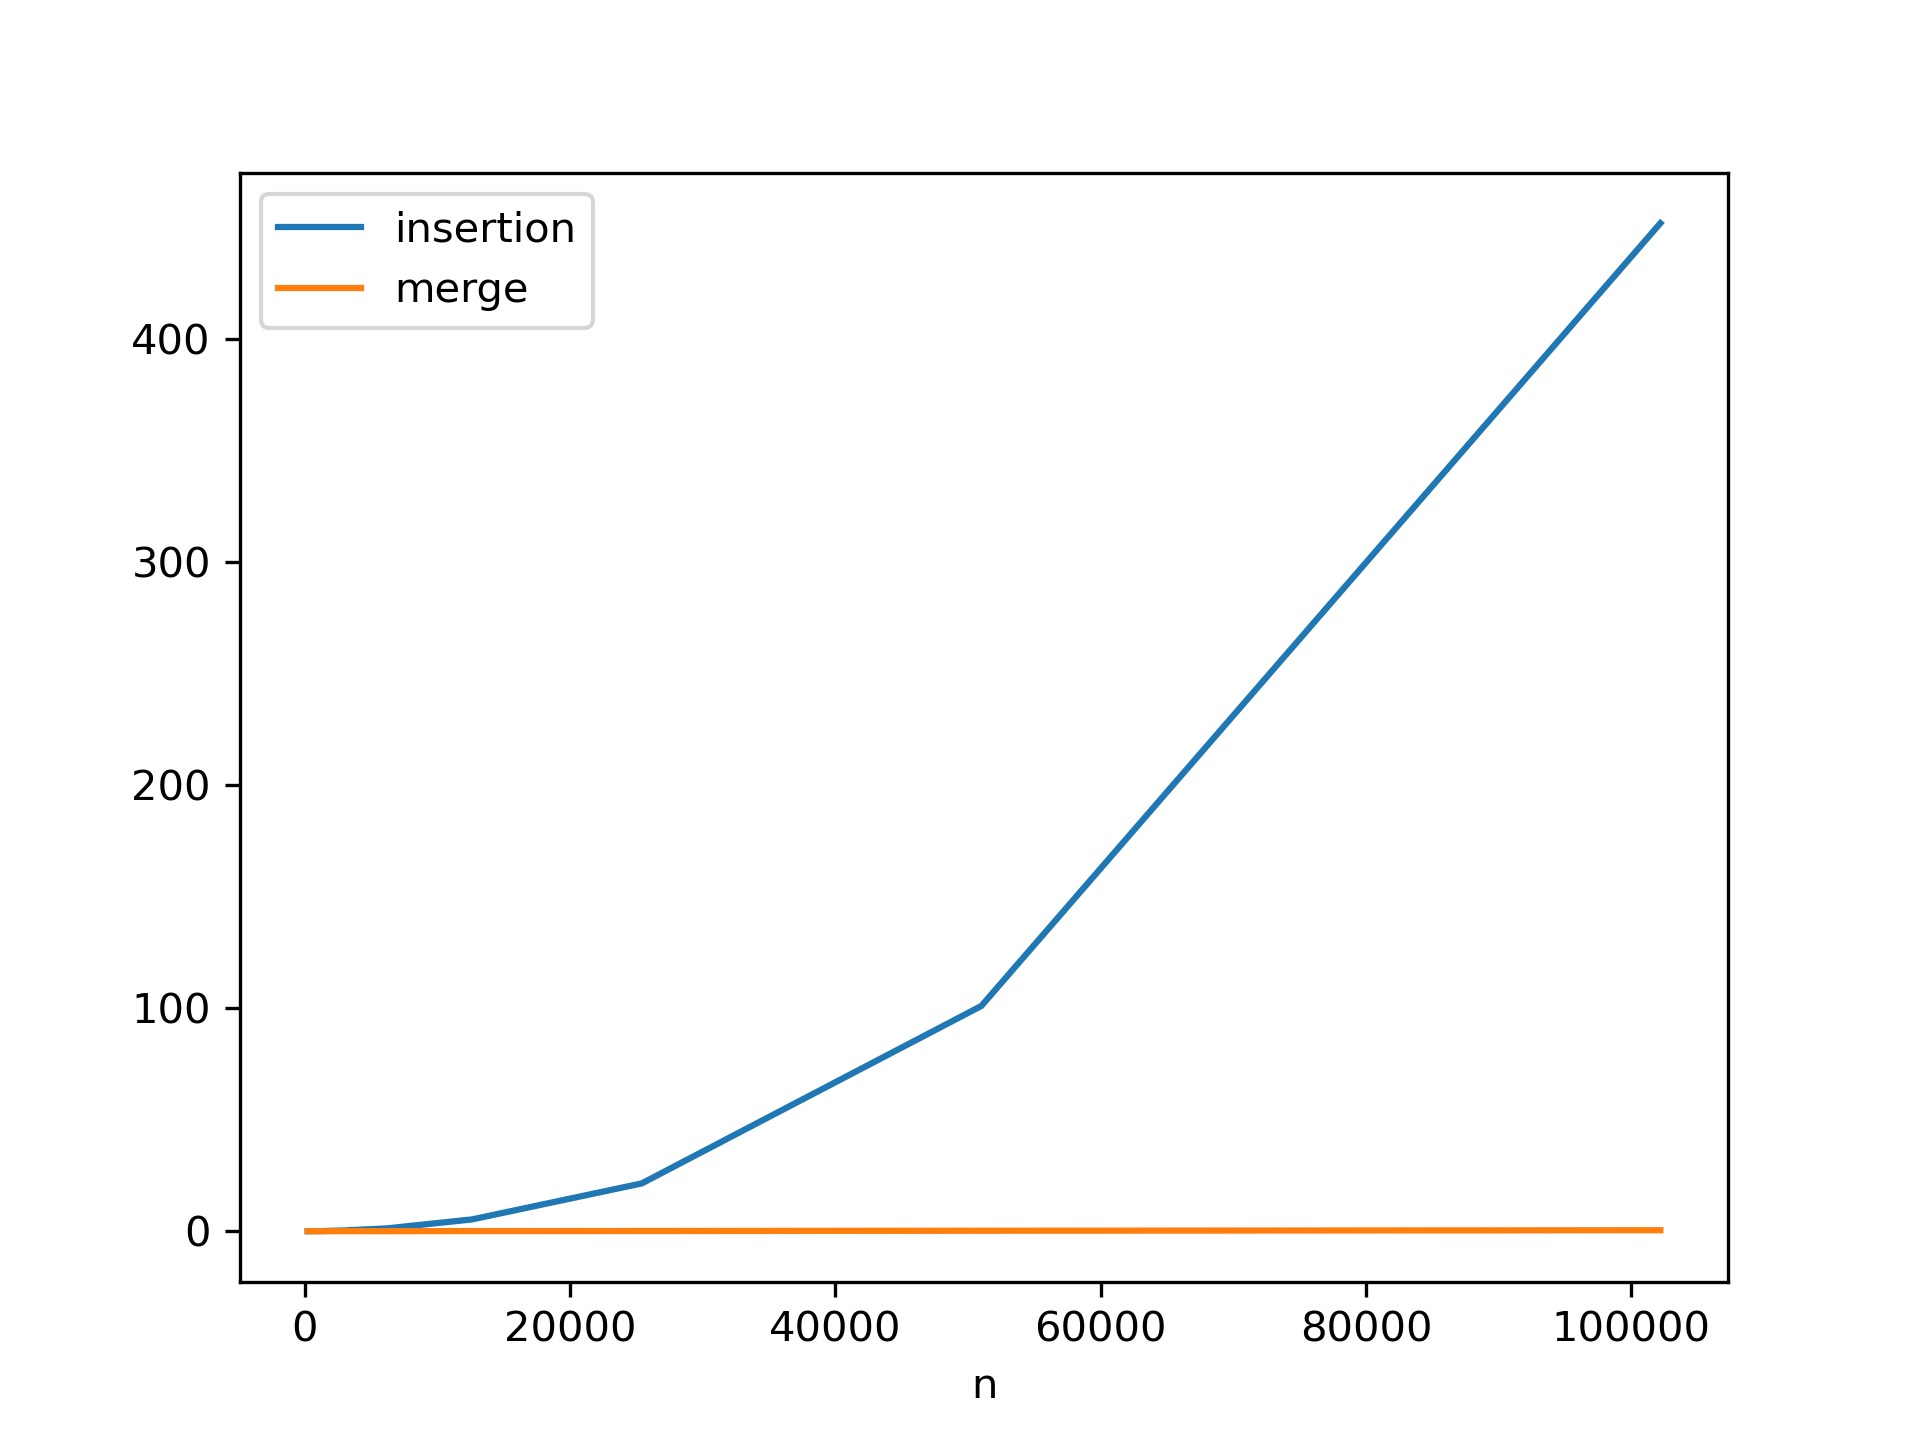

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt

df.plot(x='n');

,n,insertion,merge
12,2.0,0.000000,0.000000
11,4.0,0.000000,0.000000
10,8.0,0.000000,0.000000
9,16.0,0.000000,0.000000
8,32.0,0.000000,0.001001
7,64.0,0.000000,0.000000
6,128.0,0.002996,0.000000
5,256.0,0.005005,0.000999
4,512.0,0.020002,0.000998
3,1024.0,0.082638,0.001997


<IPython.core.display.Javascript object>


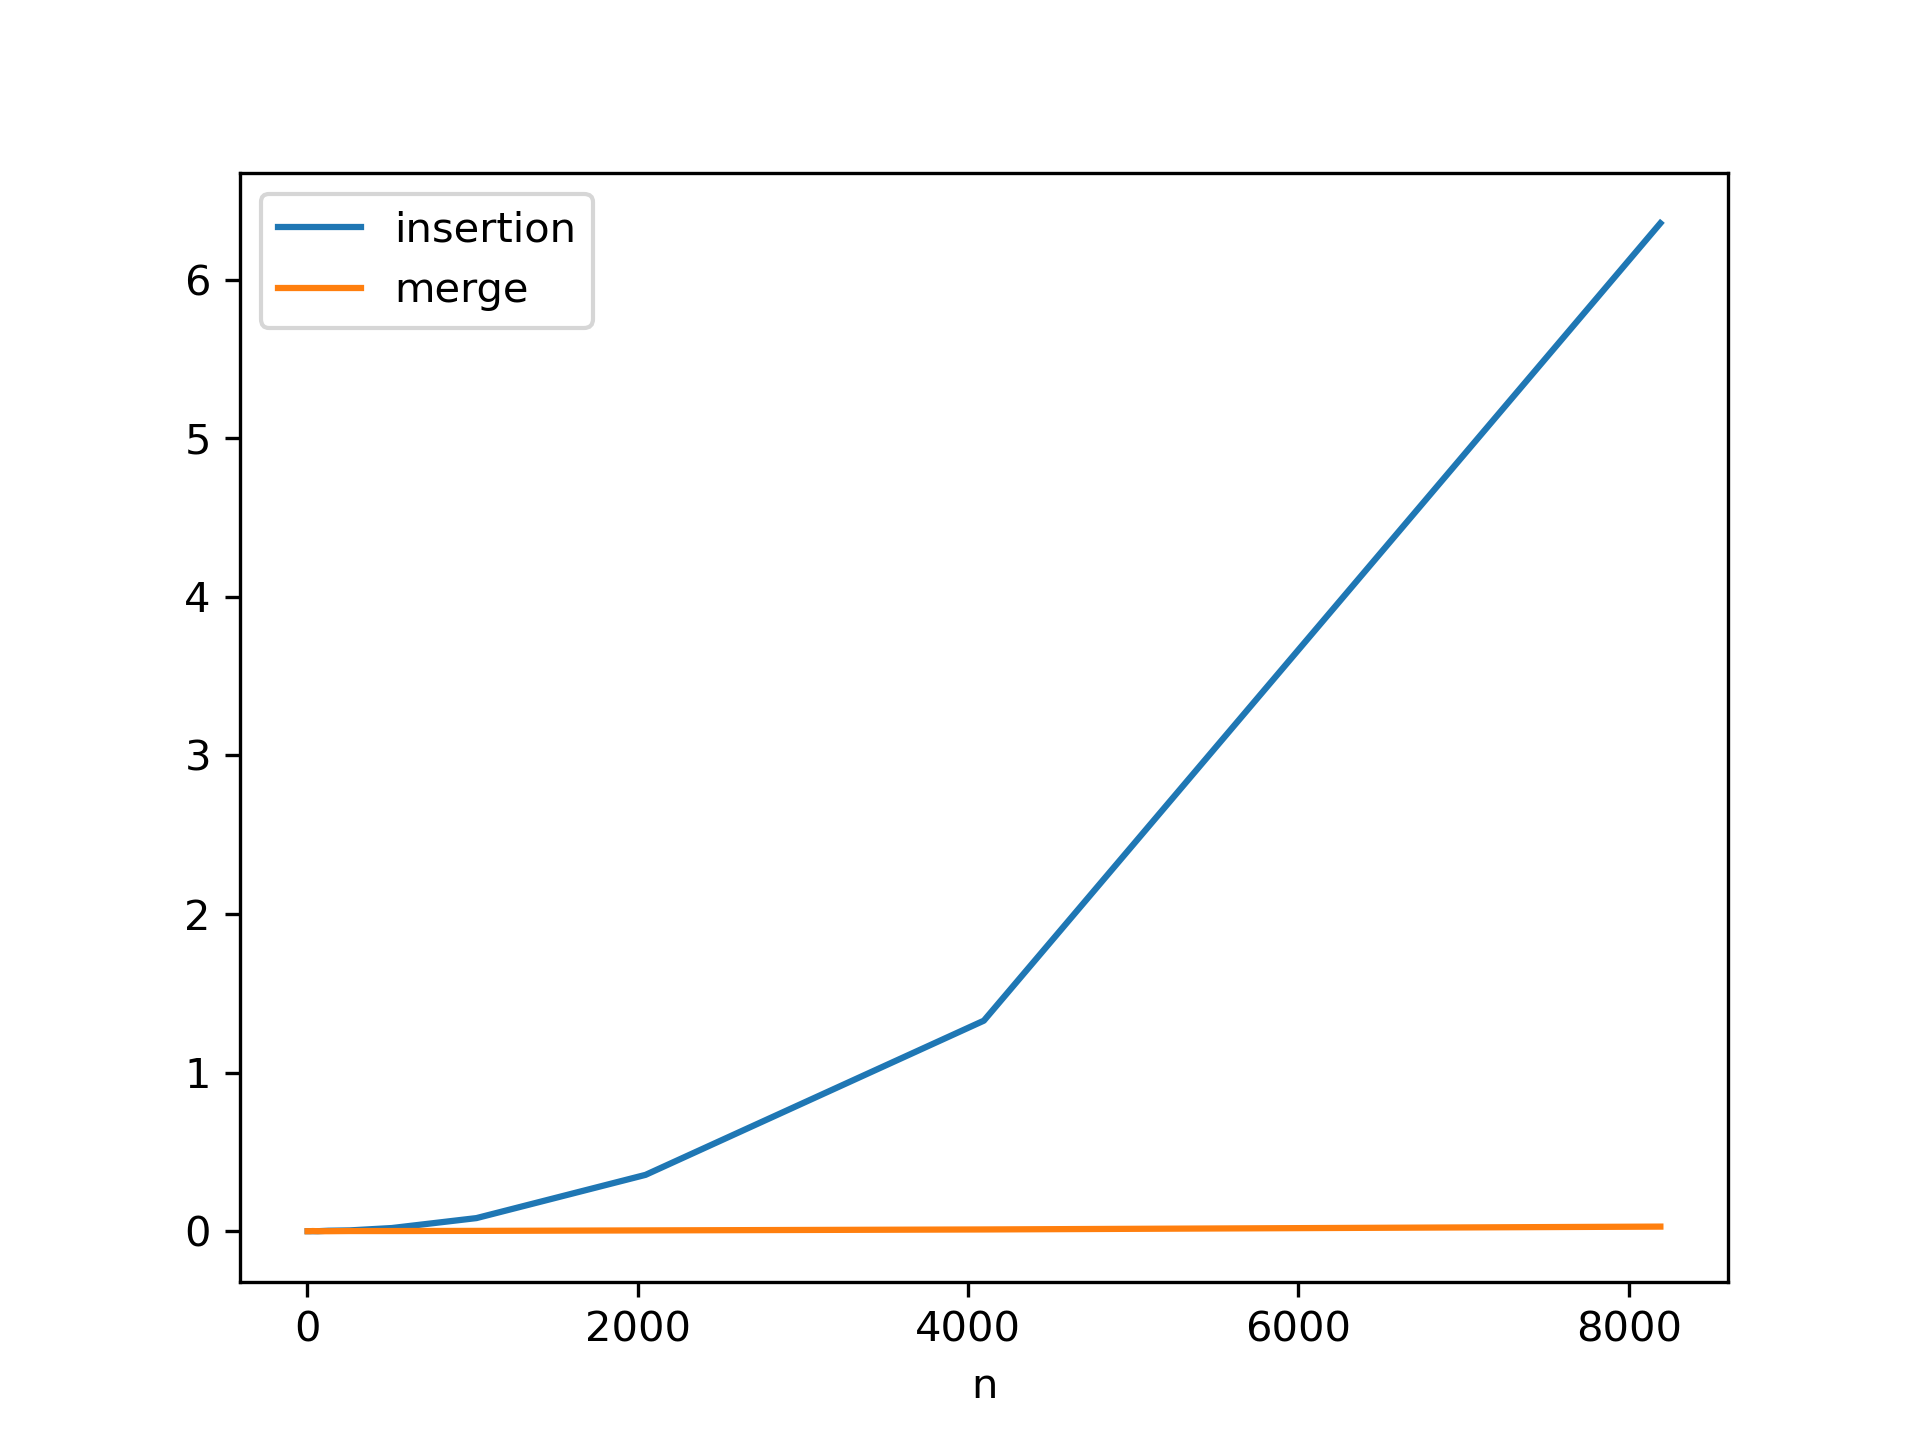

In [11]:
tests = [2,4,8,16,32,64,128,256,512,1024,2048,4096,8192]

data = {
    "n" : [],
    "insertion" : [],
    "merge" : []
}

df = pd.DataFrame(data)

for n in tests:
    array = create_random(n)
    t1, t2 = time_sort(array)
    ndf = pd.DataFrame({"n" : [n], "insertion": [t1], "merge": [t2]}, index = [0])
    df = pd.concat([ndf,df.loc[:]]).reset_index(drop=True)

df = df.sort_values(by=['n'])
display(df)
df.plot(x='n');